      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  high_blood_pressure  
0       1                  1.0  
1       1                  0.0  
2       1                  1.

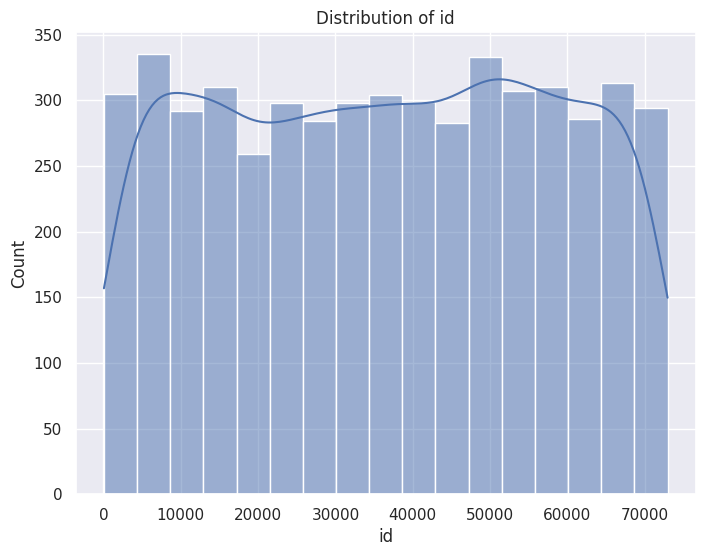

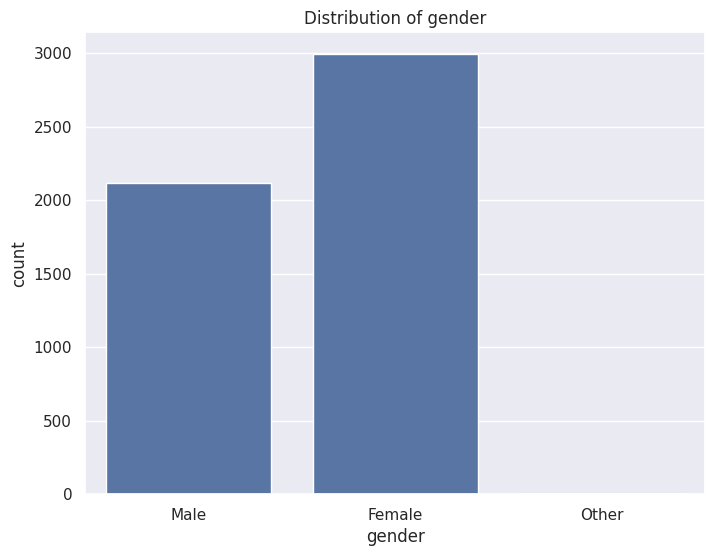

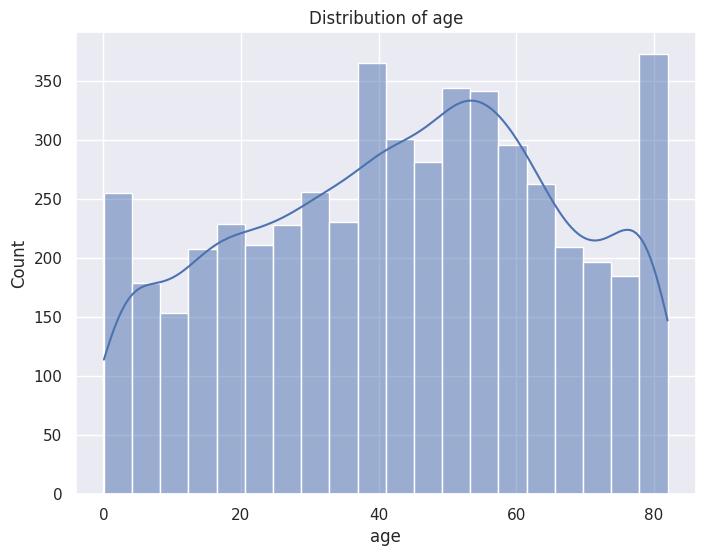

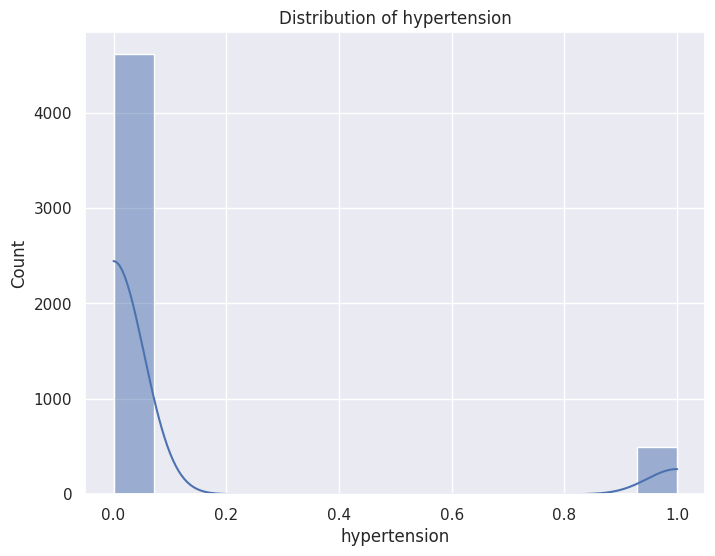

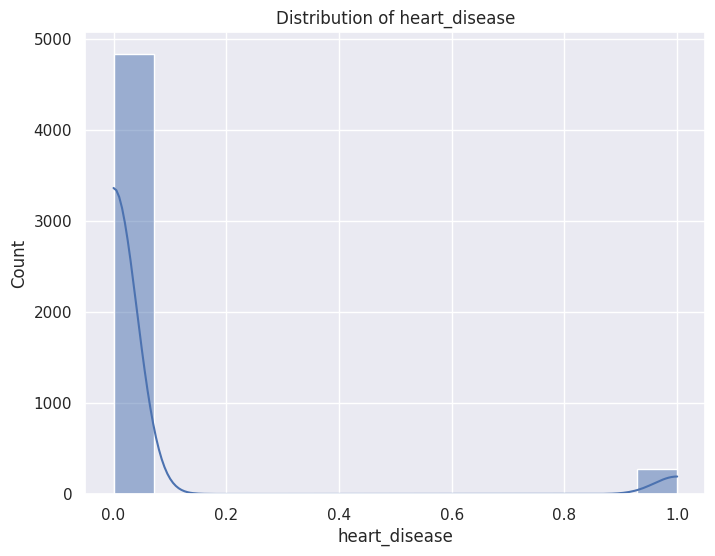

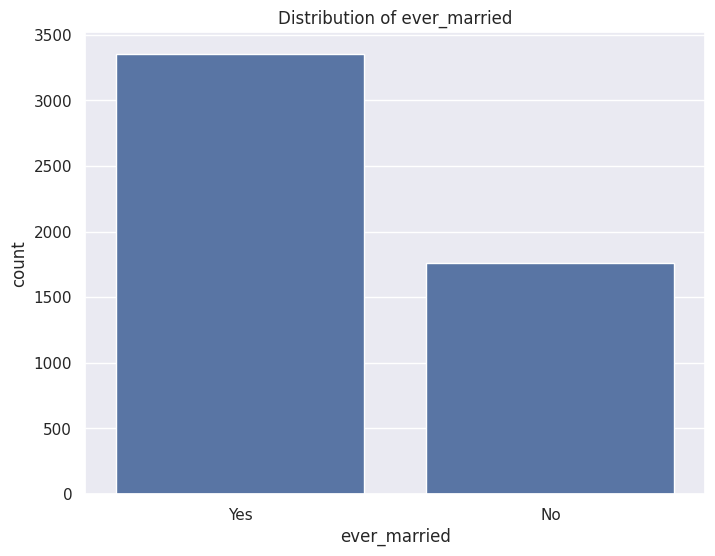

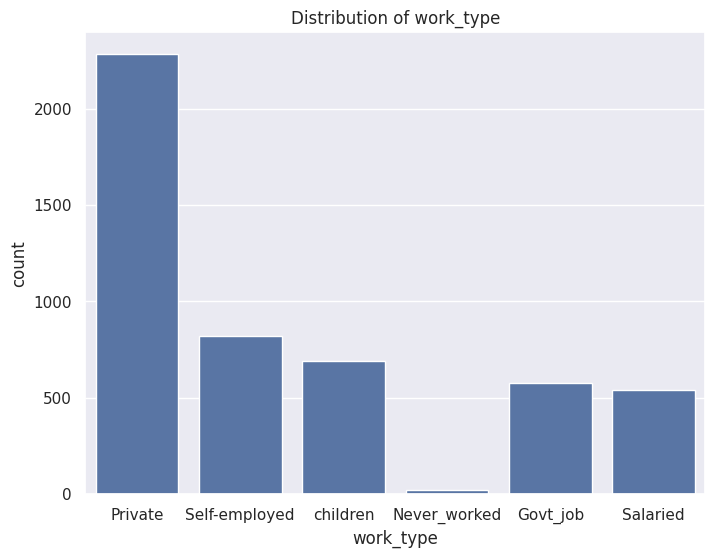

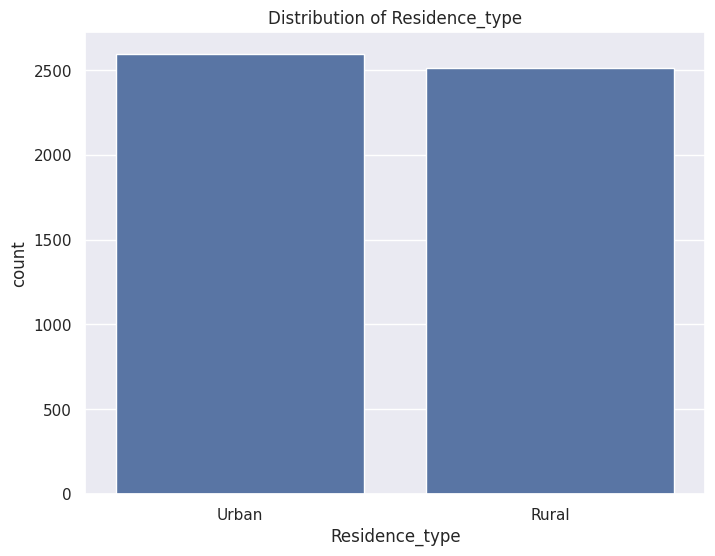

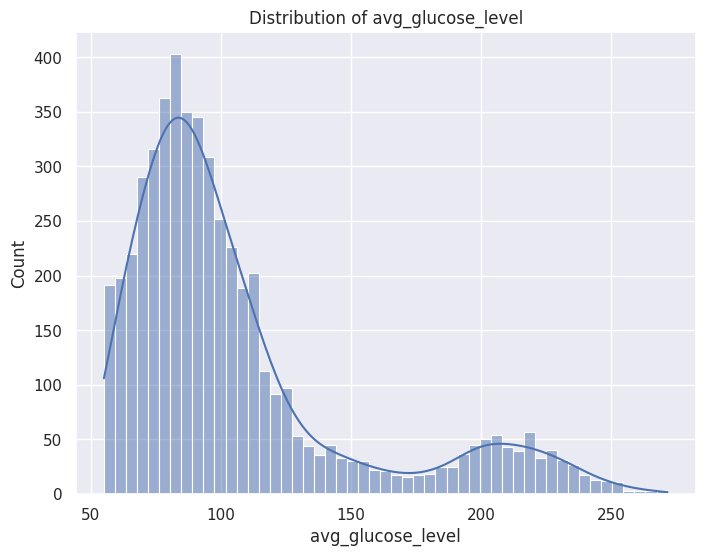

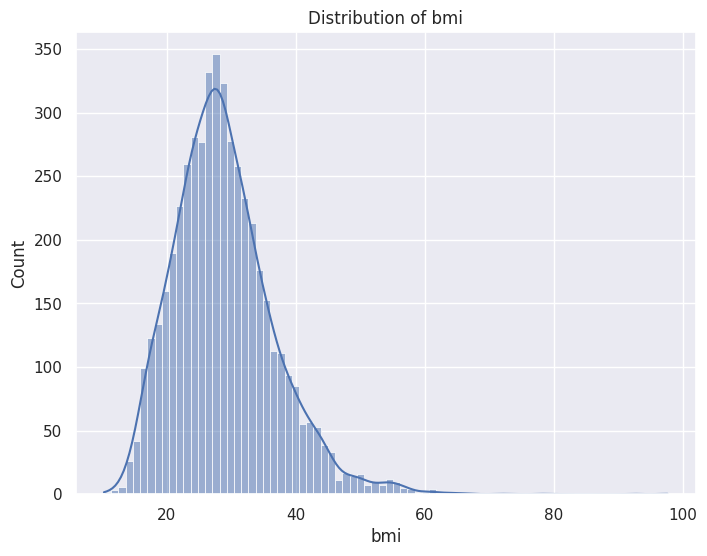

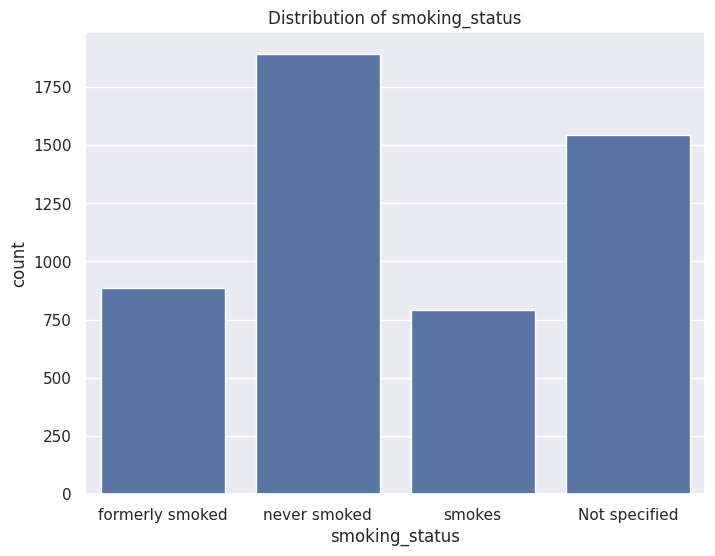

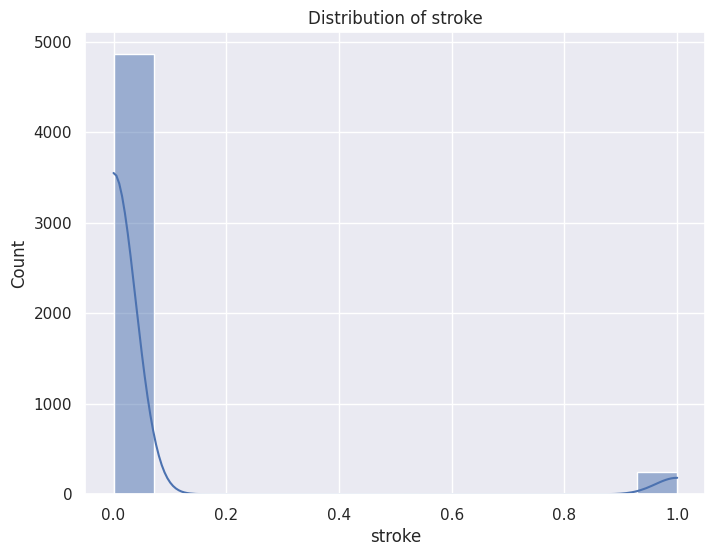

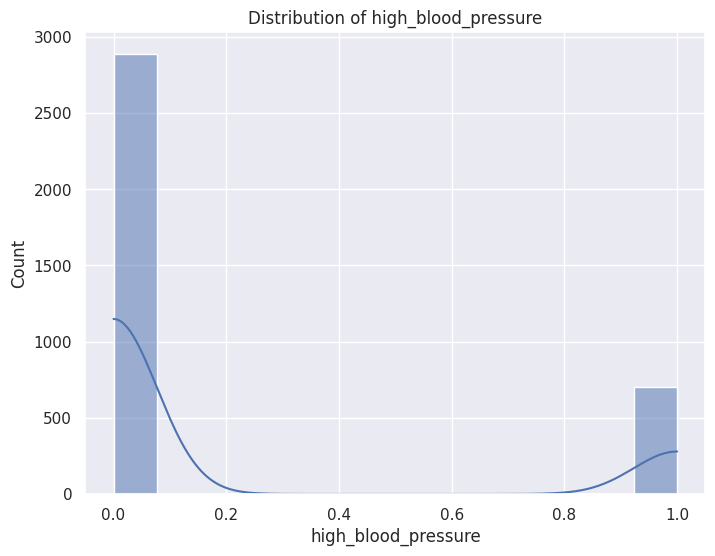

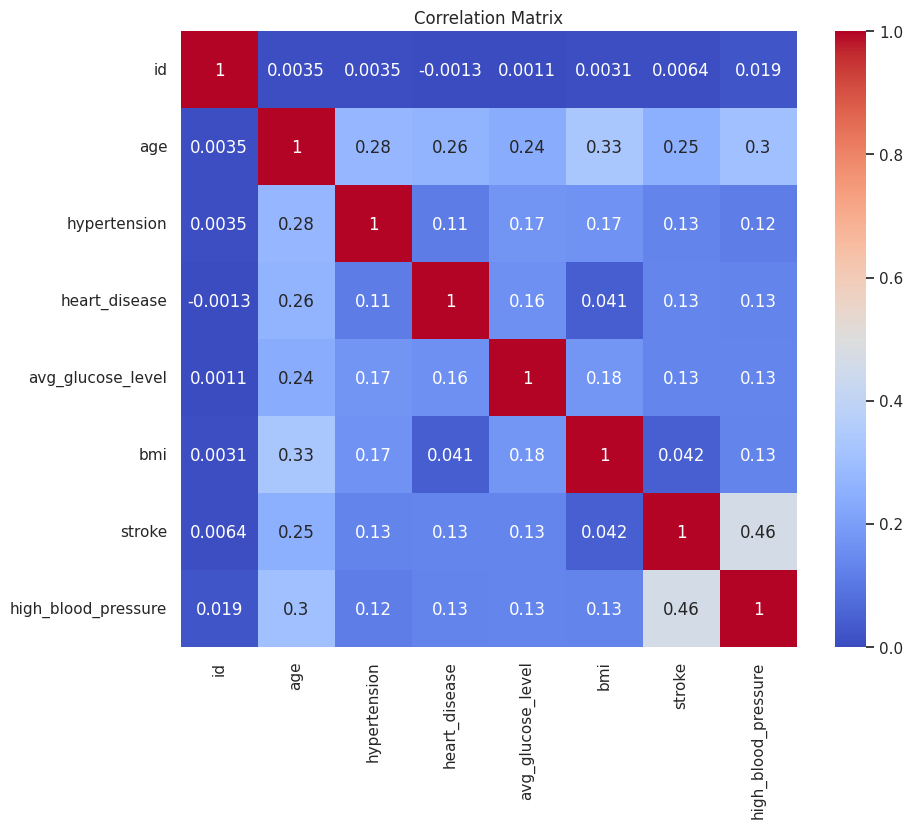

Handling missing values in work_type...
Handling missing values in bmi...
Handling missing values in high_blood_pressure...
Descriptive analysis completed.


In [4]:
# Descriptive Analysis for Healthcare dataset
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
def load_dataset(file_path):
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print("Error loading dataset:", str(e))

file_path = '/content/healthcare-stroke-data.csv'
data = load_dataset(file_path)
print(data.head())

# Perform descriptive statistics
def descriptive_statistics(data):
    print("Summary Statistics:")
    print(data.describe())
    print("\nData Types and Counts:")
    print(data.dtypes.value_counts())
    print("\nMissing Values:")
    print(data.isnull().sum())

# Visualize data distributions
def visualize_distributions(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            plt.figure(figsize=(8, 6))
            sns.countplot(x=col, data=data)
            plt.title(f"Distribution of {col}")
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            sns.histplot(data[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()

# Correlation analysis
def correlation_analysis(data):
    numeric_data = data.select_dtypes(include=[np.number])
    corr_matrix = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title("Correlation Matrix")
    plt.show()

# Handle missing values
def handle_missing_values(data):
    for col in data.columns:
        if data[col].isnull().any():
            print(f"Handling missing values in {col}...")
            if data[col].dtype == 'object':
                # Replace with mode for categorical columns
                data[col] = data[col].fillna(data[col].mode()[0])
            else:
                # Replace with mean for numeric columns
                data[col] = data[col].fillna(data[col].mean())
    return data

# Main function
def main():
    file_path = '/content/healthcare-stroke-data.csv'
    data = load_dataset('/content/healthcare-stroke-data.csv')

    if data is not None:
        descriptive_statistics(data)
        visualize_distributions(data)
        correlation_analysis(data)
        data = handle_missing_values(data)
        print("Descriptive analysis completed.")

if __name__ == "__main__":
    main()

Accuracy: 0.958904109589041
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1444
           1       0.75      0.44      0.55        89

    accuracy                           0.96      1533
   macro avg       0.86      0.71      0.77      1533
weighted avg       0.95      0.96      0.95      1533



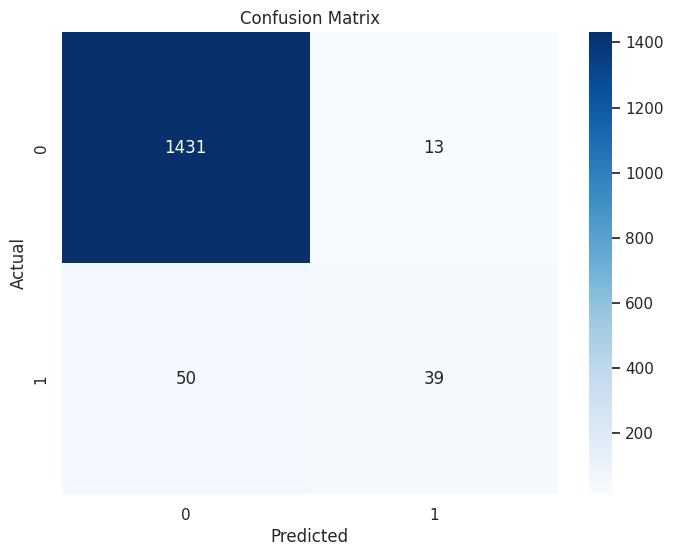

In [5]:
# machine learning model to train, test and validate the model.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


def preprocess_data(data):
    # Encode categorical features
    le = LabelEncoder()
    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    for col in categorical_cols:
        data[col] = le.fit_transform(data[col])

    # Separate features and target variable
    X = data.drop('stroke', axis=1)
    y = data['stroke']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    return X_train, X_test, y_train, y_test

def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    # Train a RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return model

# Example usage
X_train, X_test, y_train, y_test = preprocess_data(data)
model = train_and_evaluate_model(X_train, X_test, y_train, y_test)


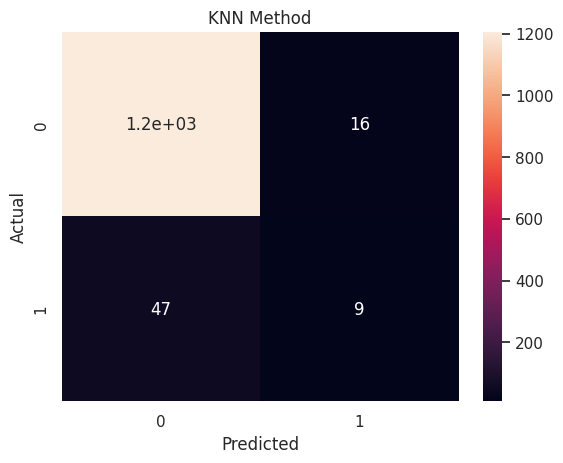

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

sns.set()

df = pd.read_csv (r'/content/healthcare-stroke-data.csv')

features = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','smoking_status']

df = df.drop("bmi", axis=1)#drop numerical nan column
#mapping all categorical columns to numeric
df["gender"] = df['gender'].map({'Female':0, 'Male':1, 'Other':2})
df["ever_married"] = df['ever_married'].map({'Yes':0, 'No':1})
df["work_type"] = df['work_type'].map({"children":0, "Govt_job":1, "Never_worked":2, "Private":3, "Self-employed":4})
df["Residence_type"] = df['Residence_type'].map({"Rural":0, "Urban":1})
df["smoking_status"] = df['smoking_status'].map({"formerly smoked":0, "smokes":1, "never smoked":2, "Unknown":np.nan})

#implementing KNN for 3 neighbors
imputer = KNNImputer(n_neighbors=3)
dfn = imputer.fit_transform(df)
#reforming the dataframe
dfn = pd.DataFrame(dfn, columns= df.columns).astype(df.dtypes.to_dict())
#split the dataframe
X_train, X_test, y_train, y_test = train_test_split(dfn[features], dfn['stroke'], test_size=0.25, random_state=100)
#implementing RandomForest
rf = RandomForestClassifier(n_estimators=5,  random_state=50)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
#creating confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
prec_score = metrics.precision_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
rec_score = metrics.recall_score(y_test, y_pred)
plt.title("KNN Method")
plt.show()
# prediction = rf.predict([[1,35,0,1,0,1,1,180,1]])
# print ('Predicted Result: ', prediction)


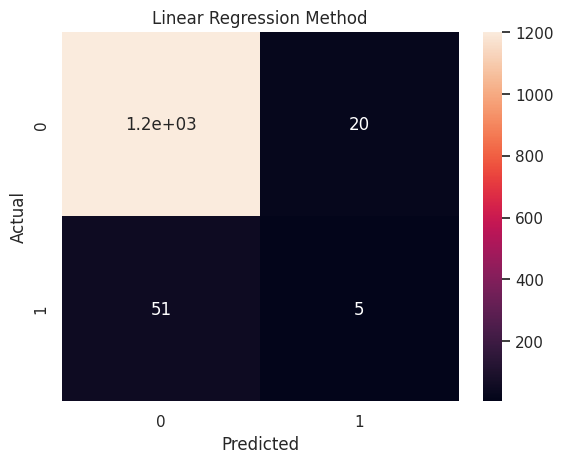

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

df = pd.read_csv (r'/content/healthcare-stroke-data.csv')

features = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi']

df = df.drop("smoking_status", axis=1)
#mapping all categorical columns to numeric
df["gender"] = df['gender'].map({'Female':0, 'Male':1, 'Other':2})
df["ever_married"] = df['ever_married'].map({'Yes':0, 'No':1})
df["work_type"] = df['work_type'].map({"children":0, "Govt_job":1, "Never_worked":2, "Private":3, "Self-employed":4})
df["Residence_type"] = df['Residence_type'].map({"Rural":0, "Urban":1})

df = df.interpolate(method='linear', limit_direction='both')

#split the dataframe
X_train, X_test, y_train, y_test = train_test_split(df[features], df['stroke'], test_size=0.25, random_state=100)
#implementing RandomForest
rf = RandomForestClassifier(n_estimators=5,  random_state=50)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
#creating confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
prec_score = metrics.precision_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
rec_score = metrics.recall_score(y_test, y_pred)
plt.title("Linear Regression Method")
plt.show()
# prediction = rf.predict([[0,70,0,0,0,3,0,117,1]])
# prediction = rf.predict([[1,35,0,1,0,1,1,117,1]])
# print ('Predicted Result: ', prediction)


In [8]:
# You are supposed to implement a hyper parameter tuning procedure for the model and showcase a systematic approach for improving model accuracy.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

def hyperparameter_tuning(X_train, y_train):
    # Define the parameter grid for RandomForestClassifier
    param_dist = {
        'n_estimators': randint(50, 200),  # Number of trees in the forest
        'max_depth': randint(10, 50),  # Maximum depth of the tree
        'min_samples_split': randint(2, 20),  # Minimum samples required to split an internal node
        'min_samples_leaf': randint(1, 10),  # Minimum samples required to be at a leaf node
        'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    }

    # Create a RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=param_dist,
        n_iter=50,  # Number of parameter settings sampled
        cv=5,  # Number of cross-validation folds
        scoring='accuracy',  # Use accuracy as the evaluation metric
        n_jobs=-1,  # Use all available CPU cores
        verbose=1,  # Print progress updates
        random_state=42
    )

    # Perform the random search
    random_search.fit(X_train, y_train)

    # Print the best hyperparameters and best score
    print("Best Hyperparameters:", random_search.best_params_)
    print("Best Score:", random_search.best_score_)

    return random_search.best_estimator_

# Example usage (assuming X_train and y_train are already defined)
best_model = hyperparameter_tuning(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of best model on test set: {accuracy}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'max_depth': 48, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 171}
Best Score: 0.9496349072885781
Accuracy of best model on test set: 0.9561815336463224
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1222
           1       0.00      0.00      0.00        56

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.96      0.93      1278



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Create a web service in python which we can test through postman, which will accept values as json (sample values attached) and provide the response from the prediction module.

from flask import Flask, request, jsonify
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

app = Flask(__name__)


@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        # Convert JSON data to DataFrame
        df = pd.DataFrame([data])

        # Preprocess the input data
        le = LabelEncoder() #  fitted with training data
        categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
        for col in categorical_cols:
            df[col] = le.fit_transform(df[col])

        scaler = StandardScaler() # fitted with training data
        numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


        # Make a prediction
        prediction = best_model.predict(df)

        # Return the prediction as JSON
        return jsonify({'prediction': int(prediction[0])})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
